In [1]:
import numpy as np
import pandas as pd
from pandasql import sqldf
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# 0. Load data

In [2]:
df = pd.read_csv('data/Rotman MMA Summer Datathon NWHL.csv')

# 1. Explore data Analysis

In [3]:
df.head()

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,...,Faceoff Win,100,43,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,...,Puck Recovery,107,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,...,Zone Entry,125,28,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,...,Shot,131,28,Snapshot,On Net,t,f,NaN,NaN,NaN
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,...,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN


In [4]:
# change column names for sql
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [5]:
df.head()

,game_date,Home_Team,Away_Team,Period,Clock,Home_Team_Skaters,Away_Team_Skaters,Home_Team_Goals,Away_Team_Goals,Team,...,Event,X_Coordinate,Y_Coordinate,Detail_1,Detail_2,Detail_3,Detail_4,Player_2,X_Coordinate_2,Y_Coordinate_2
0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,...,Faceoff Win,100,43,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,...,Puck Recovery,107,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,...,Zone Entry,125,28,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,...,Shot,131,28,Snapshot,On Net,t,f,NaN,NaN,NaN
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,...,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN


In [6]:
df.describe()

,Period,Home_Team_Skaters,Away_Team_Skaters,Home_Team_Goals,Away_Team_Goals,X_Coordinate,Y_Coordinate,X_Coordinate_2,Y_Coordinate_2
count,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,10679.000000,10679.000000
mean,2.010565,4.867086,4.866491,1.408005,0.998847,97.396771,42.192768,108.009739,42.119019
std,0.834753,0.357216,0.376766,1.598554,1.292165,63.188185,27.983077,59.195703,27.196254
min,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,5.000000,0.000000,0.000000,33.000000,15.000000,58.000000,17.000000
50%,2.000000,5.000000,5.000000,1.000000,1.000000,106.000000,42.000000,112.000000,42.000000
75%,3.000000,5.000000,5.000000,2.000000,1.000000,153.000000,69.000000,161.000000,67.000000
max,4.000000,6.000000,6.000000,6.000000,7.000000,200.000000,85.000000,200.000000,85.000000


In [7]:
df.nunique()

game_date               7
Home_Team               6
Away_Team               6
Period                  4
Clock                1201
Home_Team_Skaters       4
Away_Team_Skaters       4
Home_Team_Goals         7
Away_Team_Goals         8
Team                    6
Player                126
Event                  10
X_Coordinate          201
Y_Coordinate           86
Detail_1               33
Detail_2                3
Detail_3                2
Detail_4                2
Player_2              117
X_Coordinate_2        201
Y_Coordinate_2         86
dtype: int64

In [8]:
len(df)

26882

# 2. Number of Teams and Games

In [9]:
# 2.1 number of unique games
query_unique_games = """
    Select
        distinct
        game_date
        ,Home_Team
        ,Away_Team
    from
        df
"""

df_unique_games = sqldf(query_unique_games)
df_unique_games.to_csv('data/game_info.csv', sep='\t', index=False)
df_unique_games

,game_date,Home_Team,Away_Team
0,2021-01-23,Minnesota Whitecaps,Boston Pride
1,2021-01-23,Buffalo Beauts,Connecticut Whale
2,2021-01-23,Metropolitan Riveters,Toronto Six
3,2021-01-24,Boston Pride,Buffalo Beauts
4,2021-01-24,Connecticut Whale,Metropolitan Riveters
5,2021-01-24,Toronto Six,Minnesota Whitecaps
6,2021-01-26,Toronto Six,Boston Pride
7,2021-01-26,Metropolitan Riveters,Minnesota Whitecaps
8,2021-01-27,Connecticut Whale,Boston Pride
9,2021-01-27,Buffalo Beauts,Toronto Six


In [10]:
# 2.2 number of home games for each team
query_num_home_game = """
    Select
        Home_Team
        ,count(*) as num_home_game
    from
        df_unique_games
    group by 
        Home_Team
"""

df_num_home_game = sqldf(query_num_home_game)
df_num_home_game

,Home_Team,num_home_game
0,Boston Pride,2
1,Buffalo Beauts,4
2,Connecticut Whale,2
3,Metropolitan Riveters,2
4,Minnesota Whitecaps,1
5,Toronto Six,4


In [11]:
# 1.2 number of away games for each team
query_num_away_game = """
    Select
        Away_Team
        ,count(*) as num_away_game
    from
        df_unique_games
    group by 
        Away_Team
"""

df_num_away_game = sqldf(query_num_away_game)
df_num_away_game

,Away_Team,num_away_game
0,Boston Pride,5
1,Buffalo Beauts,2
2,Connecticut Whale,2
3,Metropolitan Riveters,1
4,Minnesota Whitecaps,3
5,Toronto Six,2


In [12]:
# 1.3 number of games for each team
query_num_game = """
Select
    Home_Team as Team_Name
    , num_home_game
    , num_away_game
    , (num_home_game + num_away_game) as num_game
FROM
    df_num_home_game
join
    df_num_away_game
on 
    df_num_home_game.Home_Team = df_num_away_game.Away_Team

"""

df_num_game = sqldf(query_num_game)
df_num_game.to_csv('data/team_info.csv', sep='\t', index=False)
df_num_game

,Team_Name,num_home_game,num_away_game,num_game
0,Boston Pride,2,5,7
1,Buffalo Beauts,4,2,6
2,Connecticut Whale,2,2,4
3,Metropolitan Riveters,2,1,3
4,Minnesota Whitecaps,1,3,4
5,Toronto Six,4,2,6


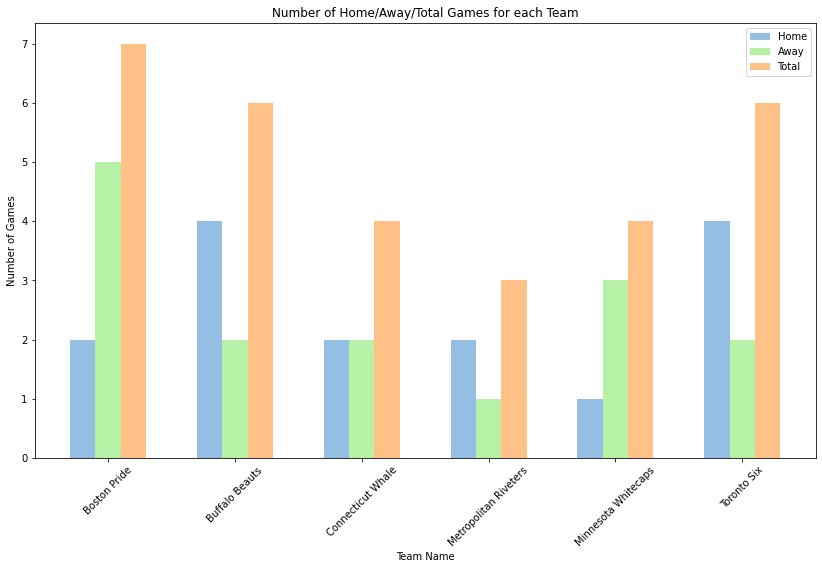

In [13]:
# bar plot of number of games for each team
plt.figure(figsize=(14,8))

X_axis = np.arange(len(df_num_game))
plt.bar(X_axis-0.2, df_num_game['num_home_game'], color='#94bee3', width=0.2, label='Home')
plt.bar(X_axis, df_num_game['num_away_game'], color='#B7F1A5', width=0.2, label='Away')
plt.bar(X_axis+0.2, df_num_game['num_game'], color='#FFC186', width=0.2, label='Total')

plt.xticks(X_axis, df_num_game['Team_Name'], rotation=45)
plt.xlabel('Team Name')
plt.ylabel('Number of Games')
plt.title("Number of Home/Away/Total Games for each Team")
plt.legend()
plt.show()


# 3. Number of Events

In [14]:
# 3.1 number of Events
query_num_events= """
    Select
        Event,
        count(*) as num_event
    FROM
        df
    group by
        Event
"""

df_num_events = sqldf(query_num_events)
df_num_events.to_csv('data/event_info.csv', sep='\t', index=False)
df_num_events


,Event,num_event
0,Dump In/Out,1863
1,Faceoff Win,846
2,Goal,76
3,Incomplete Play,3430
4,Penalty Taken,144
5,Play,7249
6,Puck Recovery,8214
7,Shot,1909
8,Takeaway,1207
9,Zone Entry,1944


Text(0.5, 1.0, 'Number of Events')

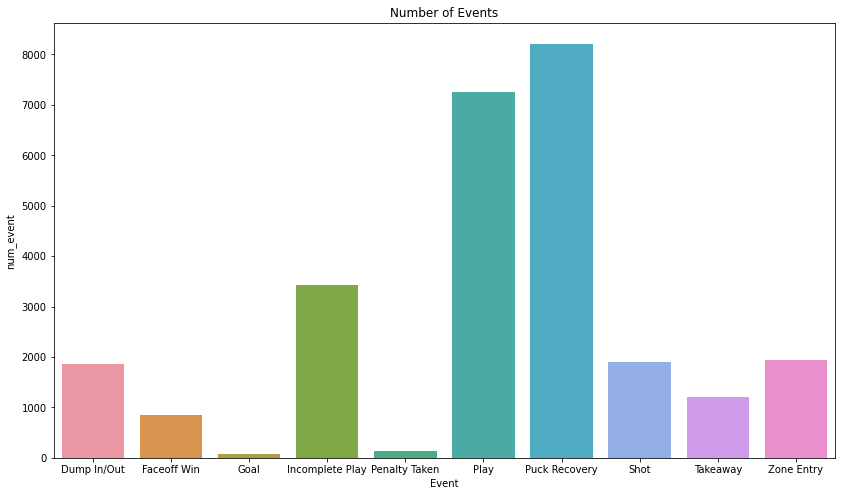

In [15]:
# bar plot of number of events

colors=["#2a4d69", "#4b86b4", "#adcbe3", "#e7eff6", "#63ace5"]

sns.set_palette(sns.color_palette(colors))
f, ax = plt.subplots(figsize=(14, 8))

sns.barplot(x="Event", y="num_event", data=df_num_events).set_title("Number of Events")

### Let's figure out which player has the most goal per game

In [16]:
#  3.2 Get the team for each Player
query_team_of_player= """
    Select
        distinct
        Team
        ,Player
    FROM
        df
"""

df_team_of_player = sqldf(query_team_of_player)
df_team_of_player

,Team,Player
0,Boston Pride,Jillian Dempsey
1,Boston Pride,McKenna Brand
2,Boston Pride,Tereza Vanisova
3,Boston Pride,Samantha Davis
4,Minnesota Whitecaps,Stephanie Anderson
...,...,...
121,Buffalo Beauts,Caty Flagg
122,Connecticut Whale,Rachael Ade
123,Connecticut Whale,Maeve Reilly
124,Connecticut Whale,Sarah Hughson


In [17]:
# 3.3 Merge to get the number of games played by each player
query_num_games_of_player= """
    Select
        Team
        ,Player
        ,num_game
    FROM
        df_team_of_player
    join
        df_num_game
    on 
        df_team_of_player.Team = df_num_game.Team_Name

"""

df_num_games_of_player = sqldf(query_num_games_of_player)
df_num_games_of_player.to_csv('data/player_info.csv', sep='\t', index=False)
df_num_games_of_player

,Team,Player,num_game
0,Boston Pride,Jillian Dempsey,7
1,Boston Pride,McKenna Brand,7
2,Boston Pride,Tereza Vanisova,7
3,Boston Pride,Samantha Davis,7
4,Minnesota Whitecaps,Stephanie Anderson,4
...,...,...,...
121,Buffalo Beauts,Caty Flagg,6
122,Connecticut Whale,Rachael Ade,4
123,Connecticut Whale,Maeve Reilly,4
124,Connecticut Whale,Sarah Hughson,4


In [18]:
# 3.4 Get the Goal of each Player in the dataset
query_player_goals= """
    Select
        Player
        ,count(Event) as num_goals
    FROM
        df
    where Event = "Goal"
    group by
        Player
"""

df_player_goals = sqldf(query_player_goals)
df_player_goals.head()


,Player,num_goals
0,Alyssa Wohlfeiler,1
1,Amanda Conway,1
2,Amy Curlew,1
3,Audra Richards,2
4,Autumn MacDougall,3


In [19]:
# 3.5 Get the Goal Per game for each player who have goaled
query_player_goals_per_game= """
    Select
        df_num_games_of_player.*
        ,df_player_goals.num_goals
        ,round((cast (num_goals as float) / num_game), 3) as goals_per_game
    FROM 
        df_num_games_of_player 
    join 
        df_player_goals
    on 
        df_num_games_of_player.Player = df_player_goals.Player
    order by goals_per_game desc
"""

df_player_goals_per_game = sqldf(query_player_goals_per_game)
df_player_goals_per_game



,Team,Player,num_game,num_goals,goals_per_game
0,Toronto Six,Mikyla Grant-Mentis,6,5,0.833
1,Metropolitan Riveters,Leila Kilduff,3,2,0.667
2,Toronto Six,Taylor Woods,6,4,0.667
3,Boston Pride,Samantha Davis,7,4,0.571
4,Minnesota Whitecaps,Nina Rodgers,4,2,0.500
5,Minnesota Whitecaps,Haley Mack,4,2,0.500
6,Minnesota Whitecaps,Audra Richards,4,2,0.500
7,Connecticut Whale,Katelynn Russ,4,2,0.500
8,Buffalo Beauts,Autumn MacDougall,6,3,0.500
9,Boston Pride,Jillian Dempsey,7,3,0.429


Text(0.5, 1.0, 'Players with the most goals per game')

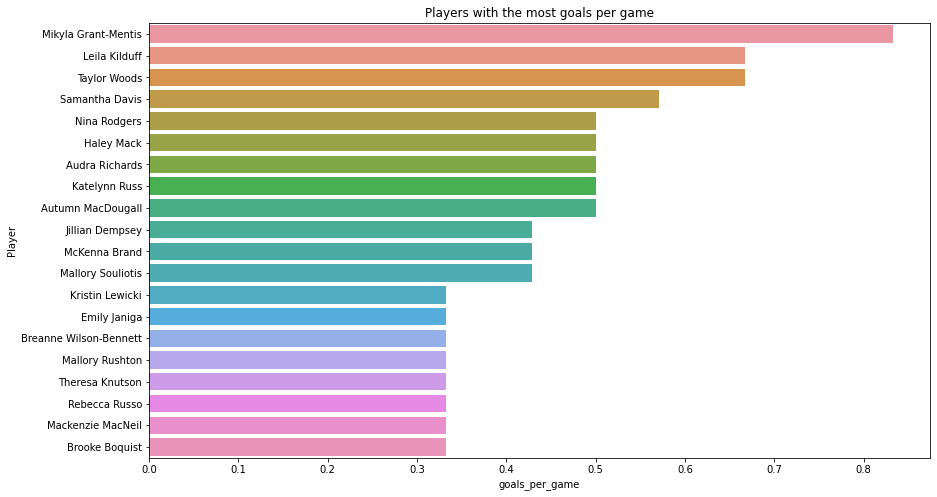

In [29]:
# 3.6 Visualization top 10 goalers!
f, ax = plt.subplots(figsize=(14, 8))
# plt.xticks(rotation=90)

sns.barplot(y="Player", x="goals_per_game", data=df_player_goals_per_game[:20], ci=None).set_title("Players with the most goals per game")

# 4. Players

In [21]:
# in the df describe section we see there are all together 126 players

# 4.1 number of player 1 event for each player
query_num_event_player1= """
    Select
        Player,
        count(*) as num_event_player1
    FROM
        df
    group by
        Player
    order by
        num_event_player1 desc
"""

df_num_event_player1 = sqldf(query_num_event_player1)
df_num_event_player1

,Player,num_event_player1
0,Kaleigh Fratkin,686
1,Shiann Darkangelo,563
2,Mallory Souliotis,557
3,Lauren Kelly,520
4,Taylor Woods,506
...,...,...
121,Rose Alleva,17
122,Sarah Hughson,16
123,Maeve Reilly,16
124,Mariah Fujimagari,8


Text(0.5, 1.0, 'Top 30 players with most player1 events')

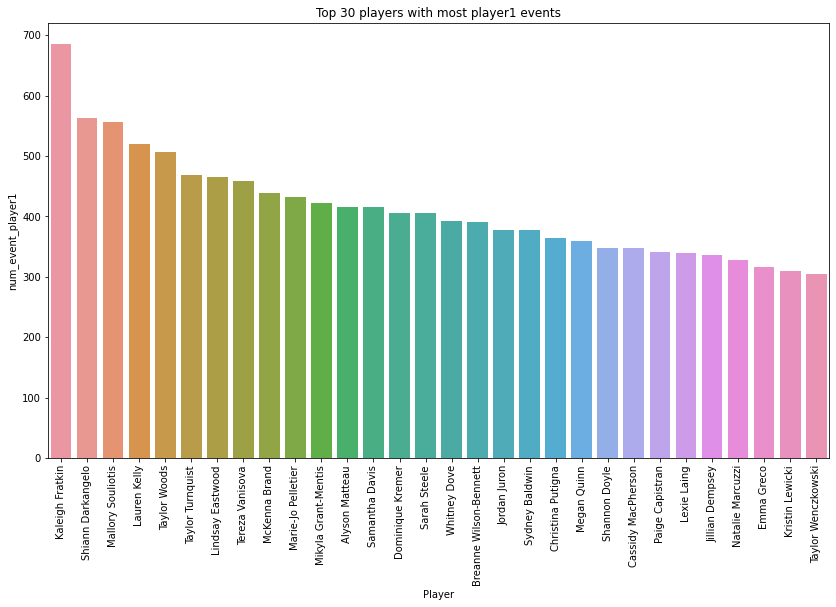

In [22]:
# Top 30 players with most player1 events

f, ax = plt.subplots(figsize=(14, 8))
plt.xticks(rotation=90)

sns.barplot(x="Player", y="num_event_player1", data=df_num_event_player1[:30]).set_title("Top 30 players with most player1 events")

In [23]:
# in the df describe section we see there are all together 126 players

# 4.2 number of player 2 event for each player
query_num_event_player2= """
    Select
        Player_2,
        count(*) as num_event_player2
    FROM
        df
    group by
        Player_2
    order by
        num_event_player2 desc
"""

df_num_event_player2 = sqldf(query_num_event_player2)
df_num_event_player2

,Player_2,num_event_player2
0,None,13277
1,Kaleigh Fratkin,296
2,McKenna Brand,290
3,Samantha Davis,241
4,Shiann Darkangelo,239
...,...,...
113,Brooke White,16
114,Rachael Ade,15
115,Elaine Chuli,2
116,Carly Jackson,2


Text(0.5, 1.0, 'Top 30 players with most player2 events')

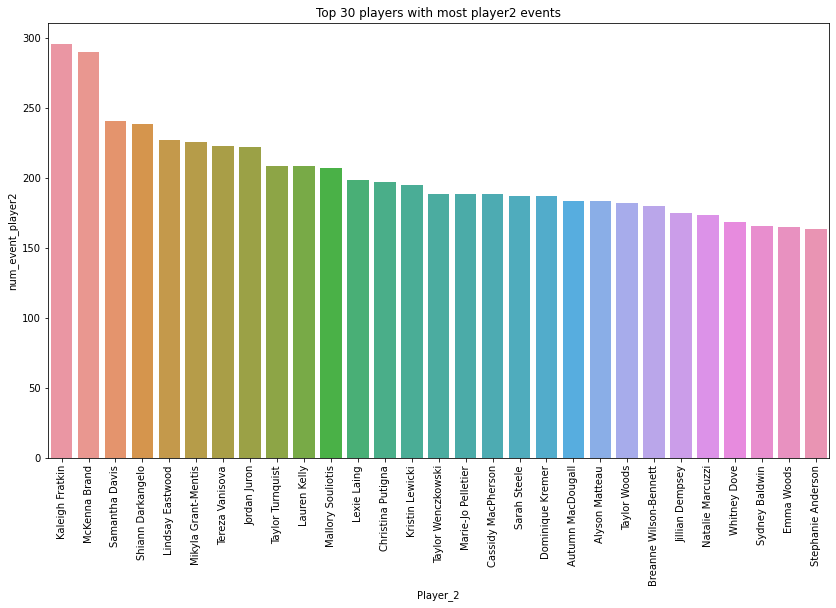

In [24]:
# Top 30 players with most player2 events

f, ax = plt.subplots(figsize=(14, 8))
plt.xticks(rotation=90)

sns.barplot(x="Player_2", y="num_event_player2", data=df_num_event_player2[1:30]).set_title("Top 30 players with most player2 events")

### It seems like *Kaleigh Fratkin* is the most active player with both role of player 1 and player 2 in our dataset, let's have a closer look at her data
Notice: unnormalized to the number of games played, should be normalized with games played

# 5. Kaleigh Fratkin

In [25]:
# 5.1 select all data regarding Kaleigh Fratkin as Player1
query_KF_1= """
    Select
        *
    FROM
        df
    where
        Player="Kaleigh Fratkin"
"""

df_KF_1 = sqldf(query_KF_1)
df_KF_1

,game_date,Home_Team,Away_Team,Period,Clock,Home_Team_Skaters,Away_Team_Skaters,Home_Team_Goals,Away_Team_Goals,Team,...,Event,X_Coordinate,Y_Coordinate,Detail_1,Detail_2,Detail_3,Detail_4,Player_2,X_Coordinate_2,Y_Coordinate_2
0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:32,5,5,0,0,Boston Pride,...,Puck Recovery,1,54,None,None,None,None,None,NaN,NaN
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:57,5,5,0,0,Boston Pride,...,Puck Recovery,2,34,None,None,None,None,None,NaN,NaN
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:57,5,5,0,0,Boston Pride,...,Play,2,34,Indirect,None,None,None,Mallory Souliotis,14.0,7.0
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,14:27,5,5,0,0,Boston Pride,...,Play,28,5,Direct,None,None,None,Meaghan Rickard,73.0,7.0
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,11:25,4,5,0,0,Boston Pride,...,Play,134,81,Direct,None,None,None,Tereza Vanisova,166.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2021-02-01,Buffalo Beauts,Boston Pride,3,3:37,5,5,1,7,Boston Pride,...,Takeaway,29,47,None,None,None,None,None,NaN,NaN
682,2021-02-01,Buffalo Beauts,Boston Pride,3,3:35,5,5,1,7,Boston Pride,...,Play,55,62,Direct,None,None,None,Meghara McManus,96.0,69.0
683,2021-02-01,Buffalo Beauts,Boston Pride,3,3:20,5,5,1,7,Boston Pride,...,Incomplete Play,191,28,Direct,None,None,None,Meghara McManus,177.0,50.0
684,2021-02-01,Buffalo Beauts,Boston Pride,3,3:17,5,5,1,7,Boston Pride,...,Puck Recovery,173,2,None,None,None,None,None,NaN,NaN


### Who does Kaleigh Fratkin most frequently pass to?

In [26]:
# 5.2 who does Kaleigh Fratkin pass to?
query_KF_pass= """
    Select
        Player_2,
        count(*) as pass_num
    FROM
        df_KF_1
    where
        Event="Play"
    group by
        Player_2
    order by
        pass_num desc
"""

df_KF_pass = sqldf(query_KF_pass)
df_KF_pass_top10 = df_KF_pass[:10]
df_KF_pass_top10.loc[10] = ["Others", df_KF_pass[10:].pass_num.sum()]
df_KF_pass_top10

/var/folders/m3/4yh806w92fdgcn0bk16ql7nw0000gn/T/ipykernel_68438/2796252015.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KF_pass_top10.loc[10] = ["Others", df_KF_pass[10:].pass_num.sum()]


,Player_2,pass_num
0,Mallory Souliotis,53
1,McKenna Brand,49
2,Samantha Davis,24
3,Tereza Vanisova,19
4,Christina Putigna,18
5,Taylor Wenczkowski,16
6,Lexie Laing,14
7,Jillian Dempsey,10
8,Tori Sullivan,7
9,Meghara McManus,6


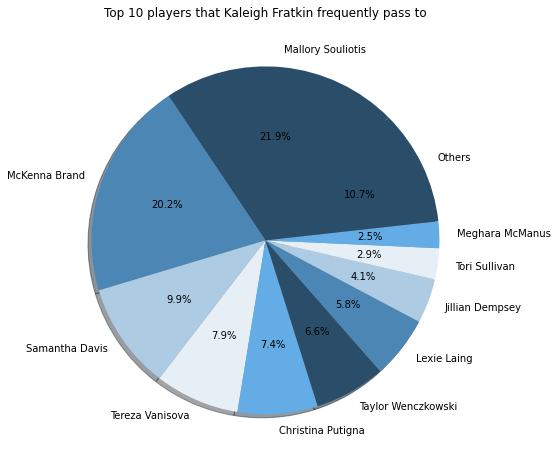

In [27]:
# 5.3 visualize the pass of Kaleigh Fratkin
f, ax = plt.subplots(figsize=(14, 8))
ax.pie(df_KF_pass_top10['pass_num'], labels=df_KF_pass_top10['Player_2'], autopct='%1.1f%%', shadow=True, startangle=45)
# ax.axis("equal")
plt.title("Top 10 players that Kaleigh Fratkin frequently pass to")
plt.show()


In [28]:
# TODO:
# Analysis of Details 1 2 3 4
# How to build up the best team?
# power play situation analysis
# ...